<a href="https://colab.research.google.com/github/karthik-karalgikar/Aedes/blob/main/VGG16epochpt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!ls "/content/gdrive/MyDrive"

'Colab Notebooks'  'Dataset_Segmentation '


In [7]:
batch_size = 64
size = (224,224)

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Dataset_Segmentation ",
    batch_size=batch_size,
    image_size=size,
    validation_split=0.2,
    subset="training",
    seed=123
)


ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Dataset_Segmentation ",
    validation_split = 0.2,
    subset = "training",
    seed = 123)


ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Dataset_Segmentation ",
    validation_split = 0.2,
    subset = "validation",
    seed = 123)

Found 664 files belonging to 2 classes.
Using 532 files for training.
Found 664 files belonging to 2 classes.
Using 532 files for training.
Found 664 files belonging to 2 classes.
Using 132 files for validation.


In [8]:
import tensorflow_datasets as tdfs

batch_size = 32

dataset_name = dataset
class_names = dataset.class_names
num_classes = len(class_names)
print(class_names)

def preprocess_image_label(image, label):
    image = tf.image.resize(image, size)
    # Convert label to one-hot encoding
    label = tf.one_hot(tf.cast(label, tf.int32), depth=num_classes)
    return image, label

ds_train_encoded = ds_train.map(preprocess_image_label)
ds_validation_encoded = ds_validation.map(preprocess_image_label)

['Testing', 'Training']


In [9]:
for image, label in ds_train_encoded.take(1):  # Taking one batch for example
    print("Image shape:", image.shape)
    print("Label shape:", label.shape)

Image shape: (32, 224, 224, 3)
Label shape: (32, 2)


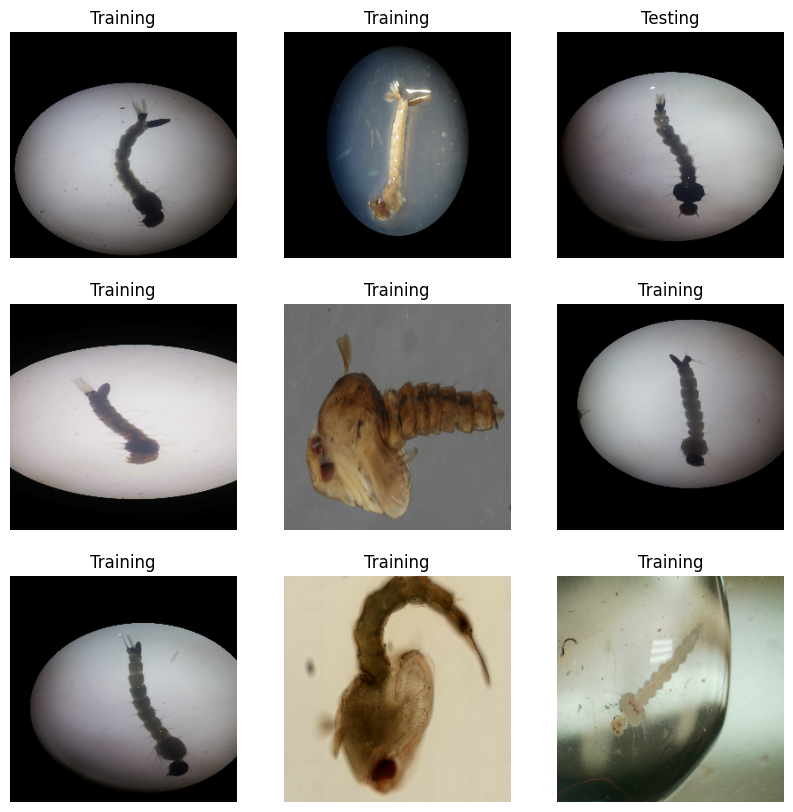

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, label in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

In [100]:
# size = (224,224)

# ds_train_resized = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
# ds_validation_resized = ds_validation.map(lambda image, label: (tf.image.resize(image, size), label))


In [17]:
# Iterate over the dataset and print the shape of the first batch
for image, label in ds_train_encoded.take(1):
    print("Shape of images in ds_train_encoded:", image.shape)
    print("Shape of labels in ds_train_encoded:", label.shape)

for image, label in ds_validation_encoded.take(1):
    print("Shape of images in ds_validation_encoded:", image.shape)
    print("Shape of labels in ds_validation_encoded:", label.shape)

Shape of images in ds_train_encoded: (32, 224, 224, 3)
Shape of labels in ds_train_encoded: (32, 2)
Shape of images in ds_validation_encoded: (32, 224, 224, 3)
Shape of labels in ds_validation_encoded: (32, 2)


In [88]:
print("Model output shape:", model.output_shape)

Model output shape: (None, 10)


In [11]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import *
import numpy as np

In [12]:
from keras.callbacks import ModelCheckpoint

In [13]:
from keras.models import Model

In [14]:
vgg = VGG16(input_shape = (224, 224, 3), weights= 'imagenet', include_top = False)

58889256/58889256 [==============================] - 0s 0us/step


In [15]:
for i in vgg.layers:
  i.trainable = False

In [16]:
x = Flatten()(vgg.output)

In [17]:
pred = Dense(2, activation= 'sigmoid')(x)

In [18]:
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
# Define input layer
input_shape = (224, 224, 3)
inputs = tf.keras.Input(shape=(input_shape))

# Add layers using functional API
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = Model(inputs = vgg.input, outputs = pred)


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(ds_train_encoded, validation_data=ds_validation_encoded, epochs=50)

Epoch 1/50
17/17 [==============================] - 485s 28s/step - loss: 7.4611 - accuracy: 0.7820 - val_loss: 4.7979 - val_accuracy: 0.6818
Epoch 2/50
17/17 [==============================] - 416s 24s/step - loss: 3.5026 - accuracy: 0.7688 - val_loss: 3.9111 - val_accuracy: 0.6970
Epoch 3/50
17/17 [==============================] - 403s 24s/step - loss: 2.3261 - accuracy: 0.7914 - val_loss: 3.3578 - val_accuracy: 0.6970
Epoch 4/50
17/17 [==============================] - 412s 24s/step - loss: 2.3741 - accuracy: 0.7932 - val_loss: 4.1891 - val_accuracy: 0.6818
Epoch 5/50
17/17 [==============================] - 411s 24s/step - loss: 2.3765 - accuracy: 0.7914 - val_loss: 4.1512 - val_accuracy: 0.7197
Epoch 6/50
17/17 [==============================] - 463s 27s/step - loss: 2.2549 - accuracy: 0.7989 - val_loss: 4.0785 - val_accuracy: 0.6818
Epoch 7/50
17/17 [==============================] - 403s 24s/step - loss: 2.1200 - accuracy: 0.8008 - val_loss: 3.7405 - val_accuracy: 0.7197
Epoch 